In [1]:
# simulacion de un proceso MA(1), esto es, ARMA(0,1)
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
ar1=np.array([1, 0]) 
ma1=np.array([1, -0.9])

In [3]:
MA_object=ArmaProcess(ar1, ma1)
simulated_data=MA_object.generate_sample(nsample=10000)

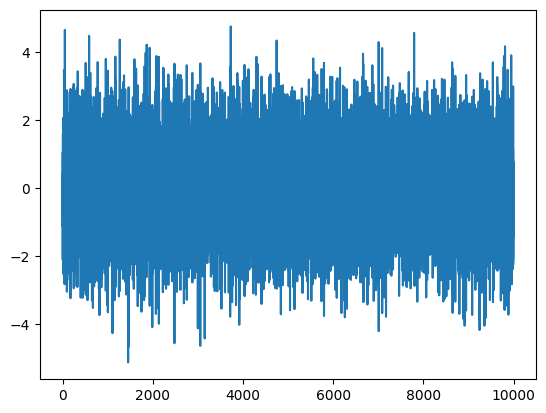

In [4]:
import matplotlib.pyplot as plt
plt.plot(simulated_data)

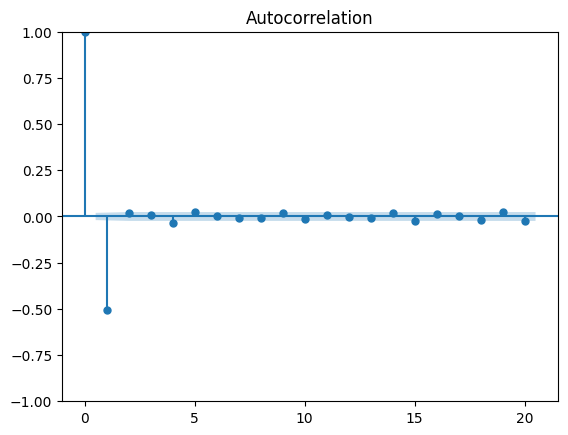

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data, lags=20)
plt.show()

In [6]:
# proceso de estimacion de parametros
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order=(0,0,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -14134.431
Date:                Wed, 17 Sep 2025   AIC                          28274.862
Time:                        14:32:35   BIC                          28296.493
Sample:                             0   HQIC                         28282.184
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.001     -1.067      0.286      -0.003       0.001
ma.L1         -0.9057      0.004   -212.184      0.000      -0.914      -0.897
sigma2         0.9889      0.014     69.279      0.0

In [7]:
# para imprimir solo un parametro que queramos
# ma.l1

print(res.params[1])

-0.9056603514522512


In [8]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Descargar datos de Yahoo Finance
apple = yf.download(tickers='AAPL', start='2021-04-06', end='2023-04-06', rounding=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
apple

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-04-06,123.16,124.06,122.62,123.45,80171300
2021-04-07,124.81,124.83,122.12,122.79,83466700
2021-04-08,127.21,127.24,125.42,125.84,88844600
2021-04-09,129.79,129.83,126.34,126.67,106686700
2021-04-12,128.07,129.64,127.48,129.32,91420000
...,...,...,...,...,...
2023-03-30,160.35,160.46,159.27,159.53,49501700
2023-03-31,162.86,162.95,159.90,160.43,68749800


In [11]:
apple = apple['Close']
apple

Ticker,AAPL
Date,
2021-04-06,123.16
2021-04-07,124.81
2021-04-08,127.21
2021-04-09,129.79
2021-04-12,128.07
...,...
2023-03-30,160.35
2023-03-31,162.86
2023-04-03,164.11


In [12]:
# Definir de grupos de entrenamiento y prueba
apple.index = pd.to_datetime(apple.index)
len_train = int(len(apple) * 0.8)
len_test = int(len(apple) * 0.2)
train = apple[0:len_train]
test = apple[len_train:]

In [13]:
test

Ticker,AAPL
Date,
2022-11-09,132.99
2022-11-10,144.83
2022-11-11,147.62
2022-11-14,146.22
2022-11-15,147.95
...,...
2023-03-30,160.35
2023-03-31,162.86
2023-04-03,164.11


In [14]:
mod = ARIMA(train, order=(0,0,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  404
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1416.180
Date:                Wed, 17 Sep 2025   AIC                           2838.359
Time:                        14:32:37   BIC                           2850.363
Sample:                             0   HQIC                          2843.111
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.5425      0.779    190.613      0.000     147.015     150.070
ma.L1          0.9277      0.020     45.295      0.000       0.888       0.968
sigma2        64.5886      5.617     11.499      0.0

In [15]:
prediccion = res.forecast(len_test)
prediccion

404    141.943527
405    148.542511
406    148.542511
407    148.542511
408    148.542511
          ...    
500    148.542511
501    148.542511
502    148.542511
503    148.542511
504    148.542511
Name: predicted_mean, Length: 101, dtype: float64

In [16]:
# creacion de dataframe para comparar
test=pd.DataFrame(test)
prediccion=pd.DataFrame(prediccion)

# resetear indices
test = test.reset_index()
prediccion = prediccion.reset_index()

In [17]:
prediccion

,index,predicted_mean
0,404,141.943527
1,405,148.542511
2,406,148.542511
3,407,148.542511
4,408,148.542511
...,...,...
96,500,148.542511
97,501,148.542511
98,502,148.542511
99,503,148.542511


In [18]:
# evaluar la bondad de ajuste
import numpy as np

acumulador1=0
acumulador2=0

# Usar el tamaño real en lugar de asumir 101
n_samples = len(test)

for contador in range(0, n_samples):
    acumulador1=acumulador1+(test.iloc[contador][1]-prediccion.iloc[contador][1])**2
    acumulador2=acumulador2+np.abs((test.iloc[contador][1]-prediccion.iloc[contador][1]) / test.iloc[contador][1])
    
mse = acumulador1/n_samples
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")
mape = (acumulador2/n_samples)*100
print(f"MAPE: {mape:.2f}%")

RMSE: 10.65
MAPE: 5.87%


## Inicio TempNY

In [19]:
# cargar informacion de temperaturas de new york
import pandas as pd
data = pd.read_csv('TempNY.csv', header=0)
data.head()

,Year,Average,Unnamed: 2
0,1870,53.60,NaN
1,1871,51.13,NaN
2,1872,50.98,NaN
3,1873,50.98,NaN
4,1874,51.34,NaN


In [20]:
data = data.drop("Unnamed: 2", axis=1)
data


,Year,Average
0,1870,53.60
1,1871,51.13
2,1872,50.98
3,1873,50.98
4,1874,51.34
...,...,...
146,2016,57.18
147,2017,56.22
148,2018,55.88
149,2019,55.62


In [21]:
#cambio de indice a datetime

data.index = data["Year"]
data = data.drop("Year", axis=1)
data

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


<Axes: xlabel='Year'>

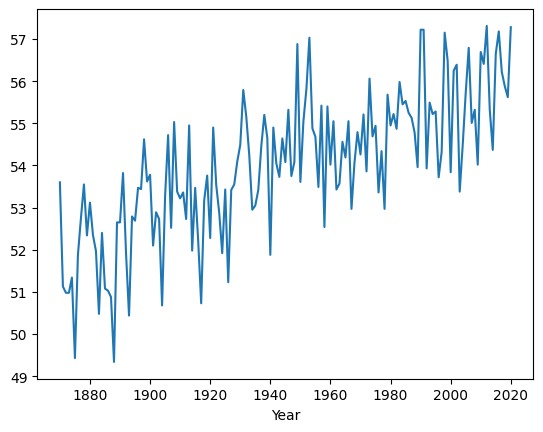

In [22]:
data["Average"].plot()

In [23]:
# prueba de dickey fuller
# H0: La serie tiene una raíz unitaria (no es estacionaria)
# H1: La serie no tiene una raíz unitaria (es estacionaria)

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(data["Average"])
print(f"El valor p de la prueba de Dickey-Fuller es: {resultado[1]:.4f}")

El valor p de la prueba de Dickey-Fuller es: 0.8417


In [24]:
print((resultado))

(np.float64(-0.7191855951167331), np.float64(0.8417172538965364), 10, 140, {'1%': np.float64(-3.4779446621720114), '5%': np.float64(-2.8824156122448983), '10%': np.float64(-2.577901887755102)}, np.float64(444.8915181430483))


Conclusion no hay evidencia estadistica para rechazar H0 y por lo tanto decir que la serie es estacionaria

In [25]:
data['temp_change'] = data['Average'].diff()
data = data.dropna()
data

,Average,temp_change
Year,,
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91
...,...,...
2016,57.18,0.53
2017,56.22,-0.96
2018,55.88,-0.34


In [26]:
# prueba de dickey fuller
# H0: La serie tiene una raíz unitaria (no es estacionaria)
# H1: La serie no tiene una raíz unitaria (es estacionaria)

result2 = adfuller(data["temp_change"])
print(f"El valor p de la prueba de Dickey-Fuller es: {result2[1]}")

El valor p de la prueba de Dickey-Fuller es: 8.361907414786182e-14


<Axes: xlabel='Year'>

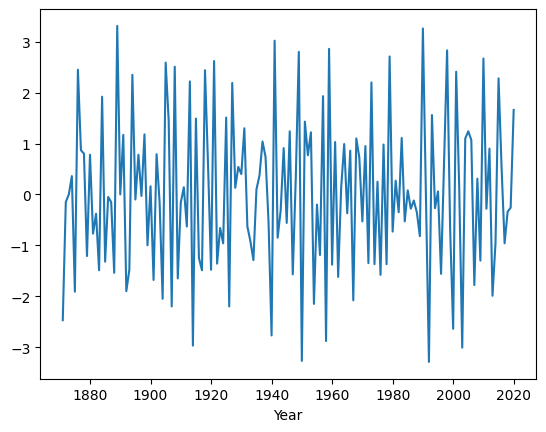

In [27]:
data['temp_change'].plot()

Conclusion: la serie transformada de diferencias si es estacionaria

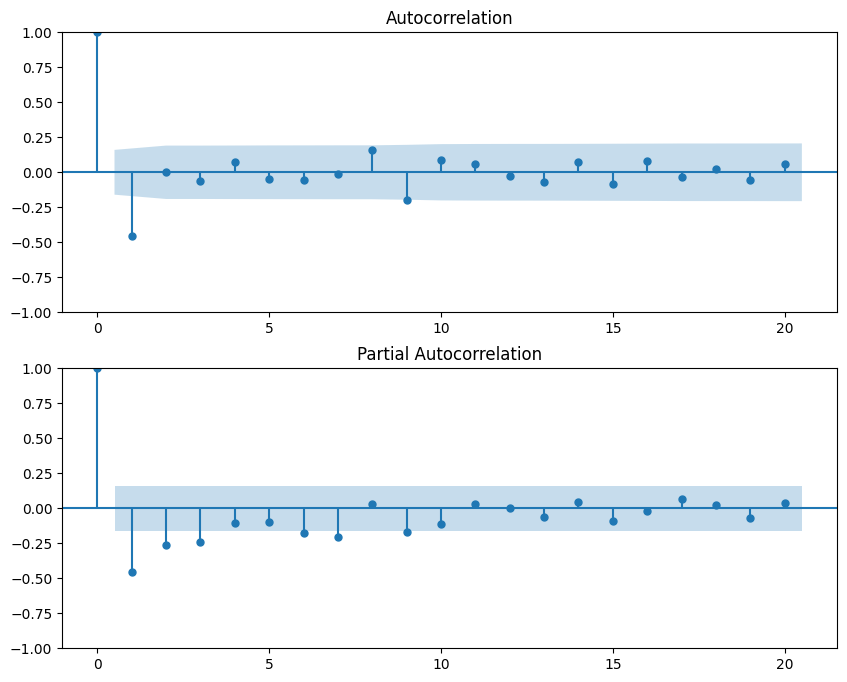

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2,1, figsize=(10,8))
plot_acf(data['temp_change'], lags=20, ax=ax[0], alpha=0.05)
plot_pacf(data['temp_change'], lags=20, ax=ax[1], alpha=0.05)
plt.show()

In [30]:
# importacion del modulo para estimar un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
# Ajuse de un modelo AR(1) imprimir su AIC
model_ar1 = ARIMA(data['temp_change'], order=(1,0,0))
res_ar1 = model_ar1.fit()
print(f"El AIC del modelo AR(1) es: {res_ar1.aic}")

El AIC del modelo AR(1) es: 519.9693852277926


In [31]:
model_ar2 = ARIMA(data['temp_change'], order=(2,0,0))
res_ar2 = model_ar2.fit()
print(f"El AIC del modelo AR(2) es: {res_ar2.aic}")

El AIC del modelo AR(2) es: 510.48447045590717


In [32]:
# Ajuste los datos a un modelo ARMA(1,0,1) e imprima su AIC
model_arma = ARIMA(data['temp_change'], order=(1,0,1))
res_arma = model_arma.fit()
print(f"El AIC del modelo ARMA(1,0,1) es: {res_arma.aic}")


El AIC del modelo ARMA(1,0,1) es: 473.8297266349273


Conclusion : la serie de tiempo original de temperatura se modela bien con ARIMA(1,1,1)

In [33]:
data = pd.read_csv('TempNY.csv', header=0)
data = data.drop("Unnamed: 2", axis=1)
data.index = data["Year"]
data = data.drop("Year", axis=1)
data

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


In [34]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

modelo = ARIMA(data['Average'], order=(1,1,1))
resultado = modelo.fit()

print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -238.826
Date:              mié., 17 sep. 2025   AIC                            483.652
Time:                        14:49:56   BIC                            492.683
Sample:                             0   HQIC                           487.321
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0646      0.109      0.590      0.555      -0.150       0.279
ma.L1         -0.8669      0.057    -15.261      0.000      -0.978      -0.756
sigma2         1.4020      0.199      7.043      0.0

In [35]:
predicciones = resultado.forecast(5)
predicciones

151    56.150447
152    56.077505
153    56.072795
154    56.072490
155    56.072471
Name: predicted_mean, dtype: float64

In [36]:
conf = resultado.get_forecast(steps=5).conf_int(alpha=0.05)
conf

,lower Average,upper Average
151,53.829710,58.471183
152,53.711871,58.443138
153,53.683072,58.462517
154,53.659996,58.484985
155,53.637485,58.507456
